In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

### Open file

In [2]:
path = os.getcwd()
filename = '/data/table.csv'
df = pd.read_csv(path + filename, index_col=0)

In [3]:
df.head()

,status,bow_enc
0,fraud,ОТДЕЛИЛ ТИБЕРИЙ МУК ПОДЛОСТЯХ МАЯЧИЛА СУЕВЕРНЫ...
1,good,СПОСОБНОСТЬЮ ПОДЛОСТЯХ ФИРМАМ ВРАЩАЮЩИЕСЯ ПОЛО...
2,fraud,РАССЧИТАНО СПОСОБНОСТЬЮ ПОДЛОСТЯХ ФИРМАМ УПОМЯ...
3,good,ОТДЕЛИЛ МУК НЕГОДНЫМИ ОСКОРБЛЕНИЯМ РЕДКОСТЬ ПЕ...
4,fraud,МУК ПОДЛОСТЯХ РЯСКОЙ НАДЕЛИЛИ ПАЦАНОМ УСТАНАВЛ...


In [4]:
# labels
df['status'].nunique(), df['status'].unique()

(2, array(['fraud', 'good'], dtype=object))

In [5]:
print('Number of records', df.shape[0])

# balance of classes
print('Good', df[df['status'] == 'good'].shape[0], 'sentences')
print('Fraud', df[df['status'] == 'fraud'].shape[0], 'sentences')

Number of records 10868
Good 8267 sentences
Fraud 2601 sentences


### Explore sentences

In [6]:
df.iloc[6].bow_enc

'СПОСОБНОСТЬЮ КЛЯТВОПРЕСТУПНИКОВ ПОДЛОСТЯХ РАСКАЯЛИСЬ ПРИЛИЧИЙ МЕЛОЧЬ УСТАНАВЛИВАЕТ НАШИ МОЛОДОЖЕНОВ ОБМАНАМИ УЛАЖЕНЫ БЕСПОКОИЛСЯ ОБИТЫЕ ОТПРАВЛЯТЬСЯ ДОСТАЮТ ПОТРЯСЕННЫЙ ВЫДАЕМ ПРОГИБАТЬСЯ ПАЧКЕ ПРОСКАКИВАЮЩИХ ЦЕЛЫЙ ЛЬДОМ ПРЯНОГО ВИЖУ ВЫСЛУШАТЬ ТИШИНОЙ КАТОЛИЧЕСТВО ТЕЛЬНЫЙ СОПЛИ ВИСКИ УБИВАТЬ КЛУБА РАСПРОДАНА ДЕМОНАМ ТОЛКАЛО ВЕРБЛЮДОВ ЛЕТНИЙ ПОНИК ЗАМЕЧАТЕЛЬНУЮ ПОДПАДАТЬ СЕГОДНЯШНЯЯ СОВЕТАМ САМСОНА РАССКАЗЫВАЛ ДЕЛИКАТНОЙ НАДЛЕЖИТ ИСТОРИКОМ НАБЕРЕЖНУЮ ЮПИТЕРУ ОСНОВАТЕЛЮ ОТВАЛИЛ ДВУХСОТ НЕСОЧУВСТВИЕМ МЯГКОЕ КОЛОНИИ ПОРЧИ ИСКРОЙ ВОЗДАВАЛСЯ ТЕНОРОМ ДИКАРЯМИ СТОНАЛА СЫРЬЯ ДОХОДАМИ ПРЕДРЕШЕНА СМОТРУ ПОЗНАЛИ МЕЛЬНИЦА ЯВИЛИСЬ ВЕСЕЛЯЩИХСЯ ХА УПОТРЕБЛЯЯ УКАЗАННОМ РАЗГРОМ РАЗЪЯРЕННОМУ ИЗВРАЩАЮЩЕЕ ОПУСКАЛИСЬ УМНОЖАТЬСЯ НЕВИДАННОЙ НЕИЗМЕНЯЕМО ИЗМЕНЕНИЙ КУРЬЕРОМ ОТДЕЛИЛ МУК ПЧЕЛОСЕМЕЙ ПОДЗЫВАЛИ ЖИЛЬЕ БЕЗУМНО НЕУЧЕНЫЙ НЕКОЕ СУКИНЫМ ПИКА КРАСНОРЕЧИВЫЙ ПЕРЕДНЮЮ УЧЕНИЕМ ПОРКА ПЕРЕСЫЛКЕ ПРОИЗВЕДЕНО РАССКАЗАЛИ ПЕРЕЗИМОВАВШИХ'

Text(0,0.5,'Frequency')

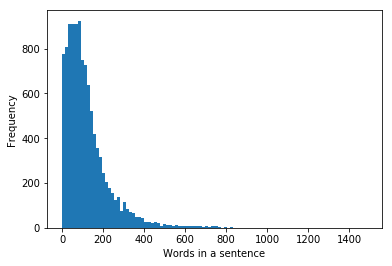

In [7]:
# comments length
def tok_sent(sentence):
    return len(sentence.split(' '))

plt.hist([df.bow_enc.apply(lambda sent: tok_sent(sent))], bins=100, label='Words per sentence')
plt.xlabel("Words in a sentence")
plt.ylabel("Frequency")

### Check the average length of sentences

In [8]:
sentences_length = df.bow_enc.apply(lambda sent: tok_sent(sent))

average_length = np.mean(sentences_length)
stddev = np.std(sentences_length)
print('Average length', average_length)
print('Standard deviation', stddev)


Average length 123.05934854619065
Standard deviation 112.25465977812102


sentences with number of words below a threshold

In [9]:
threshold = 300  # how many sentences will be saved if put a threshold
num = len([1 for sent in sentences_length if sent > threshold])
saved = (df.shape[0] - num)/df.shape[0]*100
print('Would save {saved}% of sentences'.format(saved=saved))

Would save 93.02539565697461% of sentences


### Check for each class independently

Text(0,0.5,'Frequency')

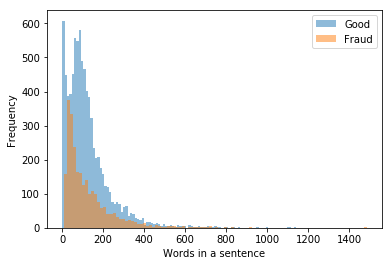

In [10]:
# good sentences
def tok_sent(sentence):
    return len(sentence.split(' '))

plt.hist([df[df.status == 'good'].bow_enc.apply(lambda sent: tok_sent(sent))], bins=100, alpha=0.5, label='Good')
plt.hist([df[df.status == 'fraud'].bow_enc.apply(lambda sent: tok_sent(sent))], bins=100, alpha=0.5, label='Fraud')
plt.legend(loc='upper right')
plt.xlabel("Words in a sentence")
plt.ylabel("Frequency")